# Part 2 - Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is a data analysis method that helps data scientists understand their data and identify patterns. It's often used as the first step in data analysis.

## Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('created_raw_data.csv')
print(df.shape)
print(df.info())
df.head()

(1010, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 709 non-null    object 
 1   given_name             503 non-null    object 
 2   surname                808 non-null    object 
 3   date_of_birth          960 non-null    object 
 4   phone_number           960 non-null    object 
 5   email                  910 non-null    object 
 6   address                834 non-null    object 
 7   city                   705 non-null    object 
 8   state                  881 non-null    object 
 9   zipcode                700 non-null    float64
 10  duplicate_2            1010 non-null   float64
 11  random label num 3     505 non-null    object 
 12  multicollinearity 1    1010 non-null   float64
 13  constant_1             1010 non-null   object 
 14  correlated w target 2  505 non-null    float6

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,random choice 7,random label num 11,informative_1,uniform corr 1,pd qcut2,multicollinearity 3,standard scaling,multicollinearity 4,multicollinearity 2,class
0,binary_2,Troy,Allen,1996-08-01,974-794-0969x179,idillon@example.net,NaN,NaN,NaN,NaN,...,Sunday,label num hi 10,-0.999102,0.353397,NaN,-0.308760,NaN,-0.276196,-0.369239,1
1,NaN,NaN,Fischer,2017-09-18,+1-758-724-2680,johnsmith@example.org,NaN,NaN,NaN,NaN,...,Thursday,label num hi 2,1.246686,0.800222,Q3,-0.276773,NaN,0.154751,-1.074681,1
2,binary_1,Shelley,Russell,1914-12-29,+1-226-526-4206x24792,gentrylaura@example.net,3920 Simmons Village Apt. 675,Johnfurt,CA,94315.0,...,Wednesday,label num hi 7,0.962777,0.760738,NaN,-0.542515,61925.695824,-0.271426,0.350587,1
3,binary_2,NaN,Conrad,1955-08-15,835.630.0141x7025,reeddeborah@example.org,320 Oneal Common,Williamchester,NJ,64638.0,...,Thursday,label num hi 1,-2.957441,0.597439,Q4,0.110135,51333.370521,0.433609,NaN,1
4,binary_2,NaN,NaN,2001-10-24,458.266.1388,travis85@example.net,511 Charles View Apt. 670,NaN,ND,64272.0,...,Tuesday,label num hi 10,1.141165,0.837511,Q3,-1.050837,53993.540300,-1.585647,0.406502,1


## Var Types

In [ ]:
df_numerical = df.select_dtypes(include='number').columns
df_object = df.select_dtypes(include=['object']).columns
df_discreet = df.select_dtypes(include=['category']).columns
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns
df_discreet

Index([], dtype='object')

In [ ]:
import numpy as np
import pickle

df_numerical = df.select_dtypes(exclude=['category', 'object']).columns.to_list()
df_object = df.select_dtypes(include=['object']).columns.to_list()
df_discreet = df.select_dtypes(include=['category']).columns.to_list()
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns.to_list()

# Create a variable to pickle
data = {'df_numerical': df_numerical, 'df_object': df_object, 'df_discreet': df_discreet, 'df_categorical_features': df_categorical_features}

# Pickle the variable and save it to a file
with open('var_types.pkl', 'wb') as f:
    pickle.dump(data, f)


## Correlation

In [ ]:
# code along
df._get_numeric_data().corr().round(2)

,zipcode,duplicate_2,multicollinearity 1,correlated w target 2,corr_feature_class,uniform corr 2,duplicate_1,correlated w target 1,outliers 1,informative_2,outliers 2,target,min max scaling,informative_1,uniform corr 1,multicollinearity 3,standard scaling,multicollinearity 4,multicollinearity 2,class
zipcode,1.00,0.01,0.05,0.03,0.01,0.01,-0.01,0.02,-0.04,0.01,-0.01,0.01,0.03,-0.01,0.05,-0.06,-0.01,-0.05,0.03,-0.06
duplicate_2,0.01,1.00,-0.06,0.64,0.32,0.71,0.10,0.50,-0.01,1.00,-0.04,0.99,-0.02,0.10,0.70,-0.03,0.06,-0.04,-0.07,0.72
multicollinearity 1,0.05,-0.06,1.00,-0.03,-0.03,-0.08,0.01,-0.08,0.01,-0.06,0.03,-0.06,-0.05,0.01,-0.05,-0.01,-0.06,0.01,0.72,-0.07
correlated w target 2,0.03,0.64,-0.03,1.00,0.20,0.42,-0.02,0.37,-0.03,0.64,-0.04,0.64,0.05,-0.02,0.44,0.00,0.09,-0.01,-0.02,0.46
corr_feature_class,0.01,0.32,-0.03,0.20,1.00,0.26,-0.07,0.14,-0.08,0.32,0.09,0.33,-0.15,-0.07,0.23,-0.03,-0.05,-0.06,-0.06,0.43
uniform corr 2,0.01,0.71,-0.08,0.42,0.26,1.00,-0.05,0.42,-0.03,0.71,-0.02,0.72,-0.03,-0.05,0.54,-0.02,0.02,-0.03,-0.07,0.57
duplicate_1,-0.01,0.10,0.01,-0.02,-0.07,-0.05,1.00,0.01,0.04,0.10,-0.03,-0.03,-0.06,1.00,-0.02,0.05,-0.03,0.07,-0.00,-0.01
correlated w target 1,0.02,0.50,-0.08,0.37,0.14,0.42,0.01,1.00,-0.08,0.50,0.01,0.50,0.00,0.01,0.37,-0.07,-0.06,-0.05,-0.09,0.39
outliers 1,-0.04,-0.01,0.01,-0.03,-0.08,-0.03,0.04,-0.08,1.00,-0.01,-0.05,-0.02,0.04,0.04,-0.03,0.02,-0.01,0.02,-0.01,-0.05
informative_2,0.01,1.00,-0.06,0.64,0.32,0.71,0.10,0.50,-0.01,1.00,-0.04,0.99,-0.02,0.10,0.70,-0.03,0.06,-0.04,-0.07,0.72


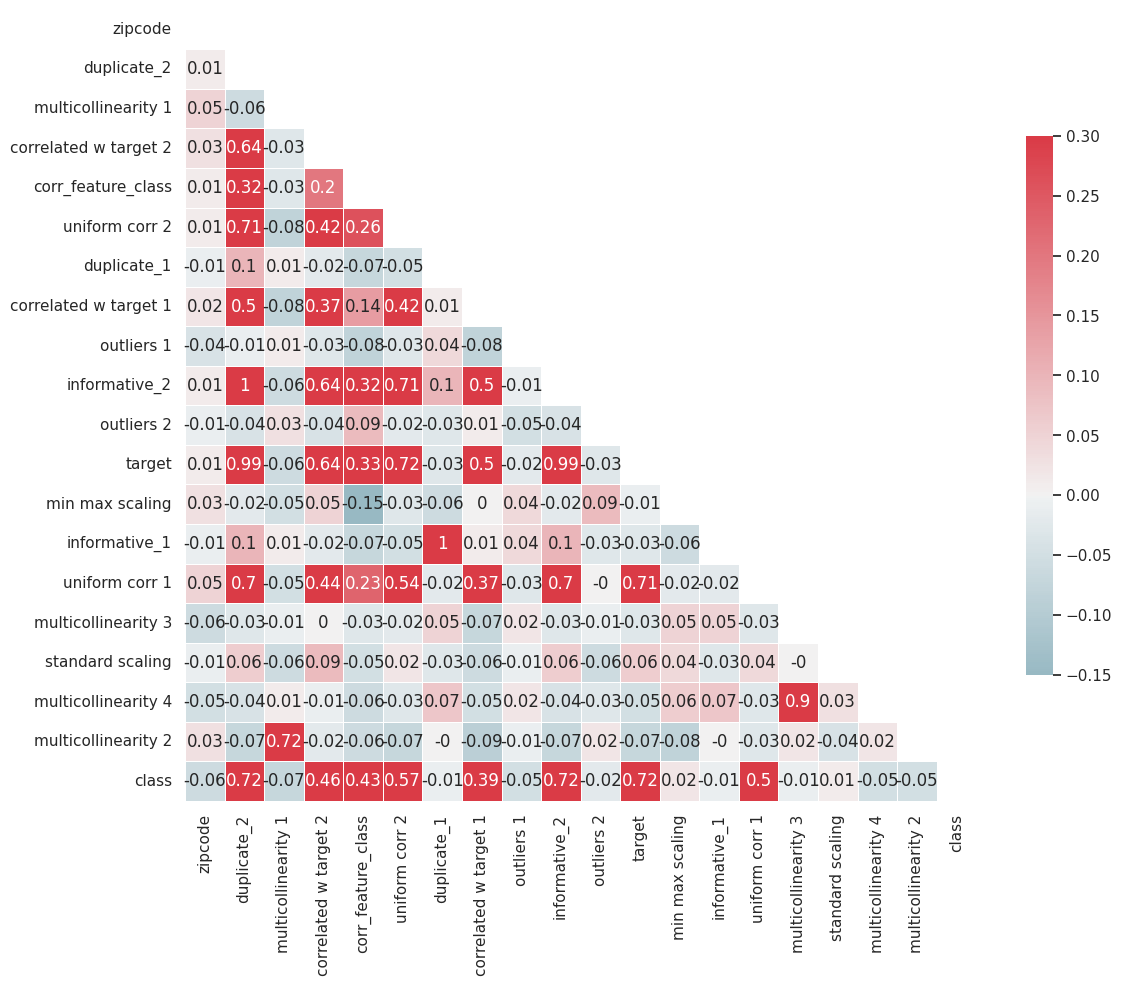

In [ ]:
# show correlation between the features
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = df._get_numeric_data().corr().round(2)

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(12, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [ ]:
import pickle

# calculate the correlation matrix
corr_matrix = df._get_numeric_data().corr()

# Create a mask for the upper triangle (to avoid duplicates)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Convert the correlation matrix to a long format
corr_df = corr_matrix.stack().reset_index()
corr_df.columns = ['feature1', 'feature2', 'correlation']

# Filter for correlations above a certain threshold (e.g., 0.7)
high_corr_df = corr_df[(abs(corr_df['correlation']) > 0.7) & (corr_df['feature1'] != corr_df['feature2'])]

# Sort by absolute correlation in descending order
high_corr_df = high_corr_df.sort_values(by='correlation', ascending=False, key=abs)

# Print the top correlated features
# print(high_corr_df['feature1'].to_list()[4:10])
print(high_corr_df)

# Create a variable to pickle
data = {'correlation scores': high_corr_df}

# Pickle the variable and save it to a file
with open('correlation_scores.pkl', 'wb') as f:
    pickle.dump(data, f)

                feature1             feature2  correlation
266        informative_1          duplicate_1     1.000000
133          duplicate_1        informative_1     1.000000
181        informative_2          duplicate_2     1.000000
29           duplicate_2        informative_2     1.000000
221               target          duplicate_2     0.991500
191        informative_2               target     0.991500
31           duplicate_2               target     0.991500
229               target        informative_2     0.991500
355  multicollinearity 4  multicollinearity 3     0.902583
317  multicollinearity 3  multicollinearity 4     0.902583
239               target                class     0.722662
391                class               target     0.722662
58   multicollinearity 1  multicollinearity 2     0.722284
362  multicollinearity 2  multicollinearity 1     0.722284
199        informative_2                class     0.717481
39           duplicate_2                class     0.7174

In [ ]:
# check for vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# handle null values (using mean imputation for simplicity)
x_copy = df.drop('class', axis=1)._get_numeric_data()
x_copy.fillna(x_copy.mean(), inplace=True)

print(max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]))

# calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                 Variable           VIF
0                 zipcode  1.008271e+00
1             duplicate_2           inf
2     multicollinearity 1  1.889454e+00
3   correlated w target 2  1.244255e+00
4      corr_feature_class  1.083129e+00
5          uniform corr 2  2.084272e+00
6             duplicate_1           inf
7   correlated w target 1  1.154621e+00
8              outliers 1  1.011738e+00
9           informative_2           inf
10             outliers 2  1.012010e+00
11                 target  1.631143e+04
12        min max scaling  1.027464e+00
13          informative_1           inf
14         uniform corr 1  1.917803e+00
15    multicollinearity 3  2.600454e+00
16       standard scaling  1.011858e+00
17    multicollinearity 4  2.612199e+00
18    multicollinearity 2  1.889527e+00


## Multicollinearity

* We want high correlation with target
* We don't want high correlation between features
* Drop correlated features
* Combine correlated features

In [ ]:
# iterate dropping features with high vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed1=[]
x_copy1 = x_copy.copy()
max_vif = thresh = 10
while max_vif >= thresh:
  my_list = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
  max_vif = max(my_list)
  if max_vif > thresh:
    max_index = my_list.index(max_vif)
    removed1.append(x_copy1.columns[max_index])
    print(x_copy1.columns[max_index], variance_inflation_factor(x_copy1, max_index))
    x_copy1.drop(x_copy1.columns[max_index], axis=1, inplace=True)


# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy1.columns
vif["VIF"] = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
print(vif)

# Create a variable to pickle
data = {'vif': vif}

# Pickle the variable and save it to a file
with open('vif.pkl', 'wb') as f:
    pickle.dump(data, f)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


duplicate_2 inf
duplicate_1 inf
target 16311.434733163702
standard scaling 21.802585549739895
min max scaling 10.139589380555593
                 Variable       VIF
0                 zipcode  4.409637
1     multicollinearity 1  1.888265
2   correlated w target 2  1.278361
3      corr_feature_class  2.022544
4          uniform corr 2  6.036078
5   correlated w target 1  1.201954
6              outliers 1  1.008540
7           informative_2  2.191039
8              outliers 2  4.016829
9           informative_1  1.044062
10         uniform corr 1  6.142648
11    multicollinearity 3  2.598376
12    multicollinearity 4  2.606176
13    multicollinearity 2  1.883892


In [ ]:
# check again vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed2=[]
max_vif = thresh = 10
while max_vif >= thresh:
  max_vif = max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])])
  for i in range(x_copy.shape[1]):
    if variance_inflation_factor(x_copy, i) > thresh:
      removed2.append(x_copy.columns[i])
      print(x_copy.columns[i], variance_inflation_factor(x_copy, i))
      x_copy.drop(x_copy.columns[i], axis=1, inplace=True)
      break

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


duplicate_2 inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


duplicate_1 inf
informative_2 16253.116223101577
min max scaling 15.124778765905534
standard scaling 14.258855282658898
                 Variable       VIF
0                 zipcode  4.369916
1     multicollinearity 1  1.888286
2   correlated w target 2  1.279478
3      corr_feature_class  2.022984
4          uniform corr 2  6.095131
5   correlated w target 1  1.201896
6              outliers 1  1.008490
7              outliers 2  3.985127
8                  target  2.254033
9           informative_1  1.012010
10         uniform corr 1  6.193829
11    multicollinearity 3  2.598372
12    multicollinearity 4  2.606059
13    multicollinearity 2  1.883909


In [ ]:
print(removed1)
print(removed2)

['duplicate_2', 'duplicate_1', 'target', 'standard scaling', 'min max scaling']
['duplicate_2', 'duplicate_1', 'informative_2', 'min max scaling', 'standard scaling']


## Outliers

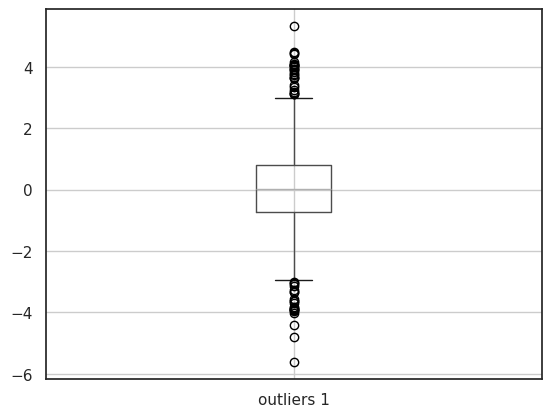

In [ ]:
# code along
df.boxplot(column=['outliers 1']);

In [ ]:
# code along
df.describe()

,zipcode,duplicate_2,multicollinearity 1,correlated w target 2,corr_feature_class,uniform corr 2,duplicate_1,correlated w target 1,outliers 1,informative_2,outliers 2,target,min max scaling,informative_1,uniform corr 1,multicollinearity 3,standard scaling,multicollinearity 4,multicollinearity 2,class
count,700.000000,1010.000000,1010.000000,505.000000,505.000000,1010.000000,1010.000000,505.000000,956.000000,1010.000000,507.000000,1010.000000,708.000000,1010.000000,959.000000,810.000000,506.000000,960.000000,909.000000,1010.000000
mean,50077.432857,-0.018978,0.028365,0.376833,2.215884,0.491943,-0.047372,0.442399,0.055815,-0.018978,2.914149,0.195609,334.778100,-0.047372,0.499993,-0.004006,49051.811207,0.014362,0.009577,0.502970
std,28647.576417,1.403413,1.008665,2.923696,3.201046,0.290949,1.324010,2.996206,1.378769,1.403413,2.112371,2.991347,97.011936,1.324010,0.287970,1.004382,9847.664968,1.029842,1.009477,0.500239
min,536.000000,-4.543441,-3.332911,-7.696914,-10.132051,0.001928,-3.836929,-8.978326,-5.613242,-4.543441,-4.463832,-8.943212,18.421199,-3.836929,0.004504,-2.822736,18863.393924,-3.108715,-2.746055,0.000000
25%,25534.000000,-1.050339,-0.668749,-1.698504,0.315894,0.229688,-1.018399,-1.525433,-0.718036,-1.050339,1.494298,-2.166961,273.446664,-1.018399,0.246918,-0.677805,42439.964842,-0.697154,-0.657556,0.000000
50%,49713.000000,-0.194004,0.058216,0.465481,2.012278,0.490536,-0.224366,0.337801,0.034259,-0.194004,2.811243,-0.011259,337.984388,-0.224366,0.509552,-0.007062,49032.195899,0.008829,0.025951,1.000000
75%,74823.250000,0.991017,0.721142,2.306384,3.989159,0.749532,0.975364,2.521041,0.808159,0.991017,4.428330,2.367192,402.246416,0.975364,0.751959,0.689543,55053.911810,0.731452,0.660396,1.000000
max,99916.000000,4.020262,3.423834,8.640366,14.826803,0.999292,3.994644,10.796624,5.330154,4.020262,8.478463,9.299296,628.744408,3.994644,0.999991,4.038275,77625.764864,3.687600,3.480677,1.000000


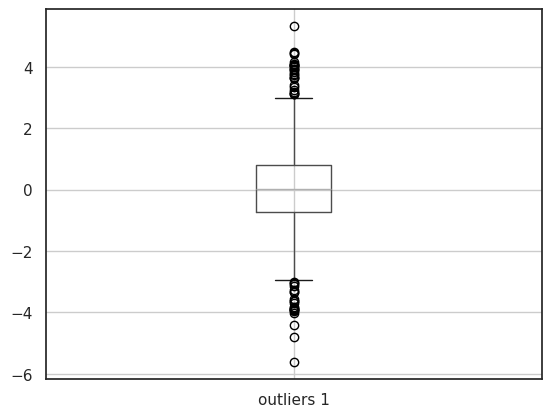

In [ ]:
# code along
df.boxplot(column=['outliers 1']);

# code along
df.describe()

# Assuming you want to store information about the 'outliers 1' column
# Calculate outliers based on IQR (Interquartile Range)
Q1 = df['outliers 1'].quantile(0.25)
Q3 = df['outliers 1'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['outliers 1'] < (Q1 - 1.5 * IQR)) | (df['outliers 1'] > (Q3 + 1.5 * IQR))]

# Create a variable to pickle
data = {'outliers': outliers}

# Pickle the variable and save it to a file
with open('outliers.pkl', 'wb') as f:
    pickle.dump(data, f)

In [ ]:
# code along
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 709 non-null    object 
 1   given_name             503 non-null    object 
 2   surname                808 non-null    object 
 3   date_of_birth          960 non-null    object 
 4   phone_number           960 non-null    object 
 5   email                  910 non-null    object 
 6   address                834 non-null    object 
 7   city                   705 non-null    object 
 8   state                  881 non-null    object 
 9   zipcode                700 non-null    float64
 10  duplicate_2            1010 non-null   float64
 11  random label num 3     505 non-null    object 
 12  multicollinearity 1    1010 non-null   float64
 13  constant_1             1010 non-null   object 
 14  correlated w target 2  505 non-null    float64
 15  semi